## algorithm design and anlysis-2025 spring  homework 4
**Deadline**：2025.5.14

**name**:


note：
---
1. 带有\*的题目，申请免上课的同学，必须完成，其他同学选作；
2. 请独立完成，如求助了他人或者大模型，请著明，并且不可省略算法分析部分；
4. 如若作答有雷同，全部取消成绩；
3. 需要书面作答的题目，可以通过引用图片的形式添加，但是注意上传项目时包含所引用的图片的源文件；
4. $log_n$ 默认表示$log_2{n}$;

## 问题 1 
**最小生成树（Minimum Spanning Tree）**

设  **G**  为一个带权重的连通无向图，且所有边的权重均不相等。令$e_i$ 为权重第 $i$ 小的边。最小生成树（MST）是否必须包含 $e_1$ ? 同理，是否必须包含 $e_2$ 和 $e_3$ ? 若必须包含，请给出证明；否则，请构造反例。需从基本原理论证，不能依赖割引理(cut lemma) 或 Prim/Kruskal算法的正确性。


answer: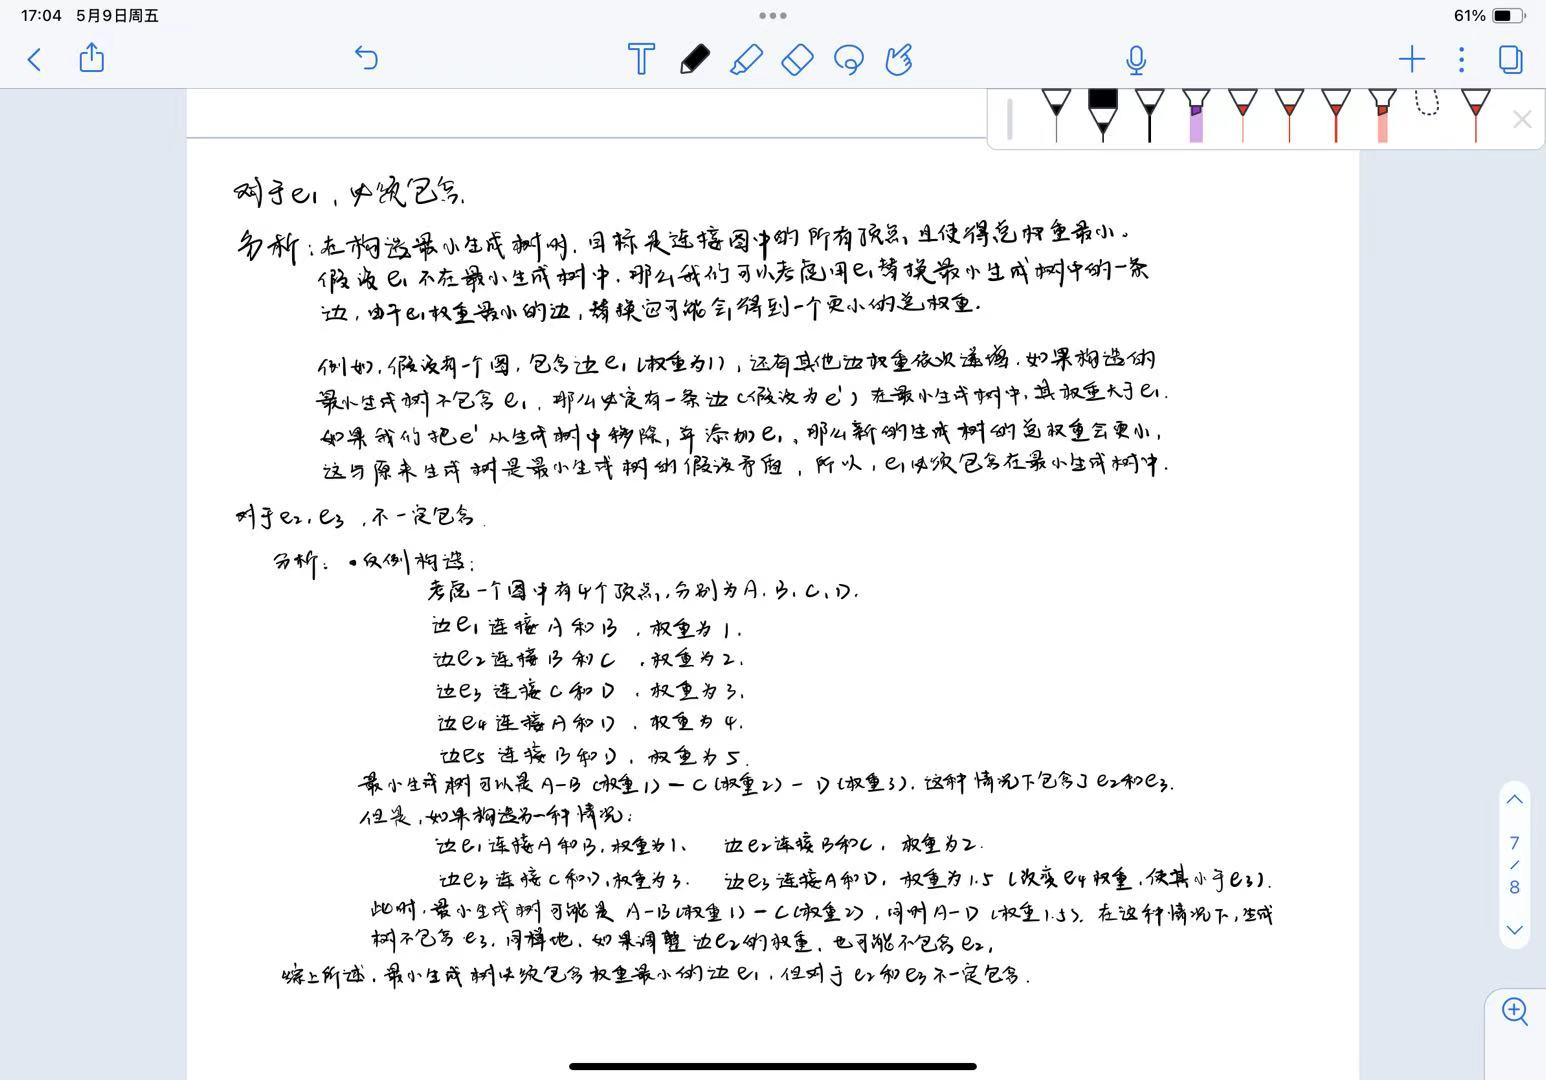

## 问题 2 
**瓶颈生成树（Bottleneck Spanning Tree）**

带有权重的无向图 $G(V,E,w)$ 的瓶颈生成树，表现为：在所有生成树中，最大权重边的权重值最小。即，BST $T$ 最小化瓶颈损失 $c(T)=max_{e \in T}{w(e)}$。

1. 证明 $G$ 的每一个最小生成树（MST）都是瓶颈生成树（BST）
2. 设计一个线性时间复杂度的算法：， 对于一个图 $G(V,E,w)$ 和一个整数 $b$，判断图 $ G$ 是否存在一个瓶颈生成树，其最大权重边的权重不超过 $b$，分析算法设计思路，并基于python编程实现。
3. 设计一个线性时间复杂度的算法：对于给定的图 $G(V,E,w)$，找到其瓶颈生成树，分析算法设计思路，并基于python编程实现。

question 1:参考deepseek
    证明：假设存在一个生成树 T 是最小生成树（MST），但不是瓶颈生成树（BST）。那么存在另一个生成树 T'，其瓶颈损失 c(T') < c(T)。在 T' 中，最大的边权重比 T 中的最大边权重小。然而，MST 的定义是总权重最小的生成树。由于 T' 是生成树且它的最大边权重比 T 小，我们可以用 T' 中的部分边替换 T 中的部分边，使得 T 的总权重减少，这与 T 是 MST 的假设矛盾。所以，每个 MST 都是 BST。

idea：
    1.对图 G 的边按权重从小到大排序。
    2.使用类似于 Krusky 算法的思路，依次尝试添加边来构建生成树：从权重最小的边开始，按权重递增顺序检查每条边。如果当前边的权重超过 b，则停止，因为后续边的权重更大，不可能满足条件。使用并查集（Union - Find）数据结构来管理连通分量。如果在遍历过程中，所有顶点都被连通，并且过程中没有添加权重超过 b 的边，那么存在这样的瓶颈生成树。

In [18]:
#question 2：参考deepseek
#algorithm of the liear time complexity :O(ElogE), 其中 E 是边数
class UnionFind:
    def __init__(self, size):
        self.parent = list(range(size))
        self.rank = [0] * size

    def find(self, x):
        if self.parent[x] != x:
            self.parent[x] = self.find(self.parent[x])
        return self.parent[x]

    def union(self, x, y):
        x_root = self.find(x)
        y_root = self.find(y)
        if x_root == y_root:
            return False
        if self.rank[x_root] < self.rank[y_root]:
            self.parent[x_root] = y_root
        else:
            self.parent[y_root] = x_root
            if self.rank[x_root] == self.rank[y_root]:
                self.rank[x_root] += 1
        return True

def task(edges, vertices_count, b):
    # edges 是一个列表，每个元素是一个元组（u, v, weight）
    # vertices_count 是顶点数量
    # b 是给定的权重阈值
    # 对边按权重从小到大排序
    edges.sort(key=lambda x: x[2])
    uf = UnionFind(vertices_count)
    edges_added = 0
    max_weight = -1
    for edge in edges:
        u, v, weight = edge
        # 如果权重超过 b，停止检查
        if weight > b:
            break
        # 检查是否连通
        if uf.find(u) != uf.find(v):
            uf.union(u, v)
            edges_added += 1
            max_weight = weight
    # 检查是否所有顶点连通
    # 所有顶点连通的条件是 edges_added == vertices_count - 1
    if edges_added == vertices_count - 1:
        return True
    else:
        return False

# 测试
edges = [
    (0, 1, 1),
    (0, 2, 3),
    (0, 3, 4),
    (1, 2, 2),
    (1, 3, 5),
    (2, 3, 6)
]
vertices_count = 4
b = 3
print("图G是否存在一个瓶颈生成树，其最大权重边的权重不超过b?   ", task(edges, vertices_count, b))


图G是否存在一个瓶颈生成树，其最大权重边的权重不超过b?    False


idea：参考deepseek
1.对图 G 的边按权重从小到大排序。
2.使用类似于 Krusky 算法的思路构建生成树：从权重最小的边开始，按权重递增的顺序添加边。使用并查集（Union - Find）数据结构来管理连通分量。在构建过程中，记录当前生成树中的最大边权重，这就是瓶颈损失。
3.时间复杂度分析：排序边需要 O(ElogE) 时间。在实际应用中，如果边权重分布合适，可以通过桶排序等方式优化到线性时间。并查集操作的单次时间复杂度接近 O(1)，整体时间复杂度主要由排序决定。

In [19]:
class UnionFind:
    def __init__(self, size):
        self.parent = list(range(size))
        self.rank = [0] * size

    def find(self, x):
        if self.parent[x] != x:
            self.parent[x] = self.find(self.parent[x])
        return self.parent[x]

    def union(self, x, y):
        x_root = self.find(x)
        y_root = self.find(y)
        if x_root == y_root:
            return False
        if self.rank[x_root] < self.rank[y_root]:
            self.parent[x_root] = y_root
        else:
            self.parent[y_root] = x_root
            if self.rank[x_root] == self.rank[y_root]:
                self.rank[x_root] += 1
        return True

def find_bottleneck_spanning_tree(edges, vertices_count):
    # edges 是一个列表，每个元素是一个元组（u, v, weight）
    # vertices_count 是顶点数量
    # 对边按权重从小到大排序
    edges.sort(key=lambda x: x[2])
    uf = UnionFind(vertices_count)
    bottleneck_tree = []
    edges_added = 0
    max_weight = -1
    for edge in edges:
        u, v, weight = edge
        if uf.find(u) != uf.find(v):
            uf.union(u, v)
            bottleneck_tree.append(edge)
            edges_added += 1
            max_weight = weight
            if edges_added == vertices_count - 1:
                break
    # 检查是否所有顶点连通
    if edges_added == vertices_count - 1:
        return bottleneck_tree, max_weight
    else:
        return None, None  # 图不连通

# 测试
edges = [
    (0, 1, 1),
    (0, 2, 3),
    (0, 3, 4),
    (1, 2, 2),
    (1, 3, 5),
    (2, 3, 6)
]
vertices_count = 4
bottleneck_tree, max_weight = find_bottleneck_spanning_tree(edges, vertices_count)
if bottleneck_tree is not None:
    print("瓶颈生成树边:")
    for edge in bottleneck_tree:
        print(edge)
    print(f"瓶颈损失（最大边权重）: {max_weight}")
else:
    print("这个图没有连通！")

瓶颈生成树边:
(0, 1, 1)
(1, 2, 2)
(0, 3, 4)
瓶颈损失（最大边权重）: 4


## 问题 3

**道路网（Road Network）**

假设有一个以图 $ G(V, E, l) $ 表示的道路网络，连接了一组城市 $ V $。我们假设该网络是有向的，并且每条道路 $(u, v) \in E$ 都有一个非负的长度 $ l(u, v) $。一条新的道路即将被建造，因此有一个列表 $ E' $ 包含它可以连接的城市对。每对 $(u, v) \in E'$ 都有一个对应的长度 $ l'(u, v) $。我们希望选择一对城市，使得两个城市 $ s, t \in V $ 之间的距离减少最大。请为此问题编写一个高效的算法，并详细解释算法的正确性和复杂度。


参考deepseek
一、算法思路
1.计算原始最短路径
首先，对于给定的图，使用 Floyd - Warshall 算法计算所有城市对之间的最短路径。这样可以得到一个距离矩阵，其中 dist[i][j] 表示城市 i 到城市 j 的原始最短距离。
时间复杂度：Floyd - Warshall 算法的时间复杂度是 O(n^3)，其中 n 是城市数量。这是因为该算法需要三个嵌套循环来更新所有城市对之间的距离。
2.评估新道路候选边
对于每一对城市 (u, v) 以及对应的长度 w，在现有的最短路径基础上，考虑添加这条新边 u - > v 后，城市对之间的最短距离可能的变化。
对于所有城市对 (i, j)，当添加这条新边时，新的最短距离可能是原来的最短距离，或者通过这条新边形成的路径更短。例如，新的最短距离可能是 min(dist[i][j], dist[i][u] + w + dist[v][j])。
遍历所有候选新道路，计算每条新道路能带来的最大距离减少量。具体来说，对于城市对 (u, v) 的新道路，它能带来的最大距离减少量 为original_dist - new_dist，其中original_dist 是原始图中 i 到 j 的最短距离，new_dist 是添加新边后的新的最短距离。
时间复杂度：对于每一条候选新道路，需要遍历所有城市对来计算潜在的距离减少量，时间复杂度为 O(m⋅n^2)，其中 m 是候选新道路的数量。
3.选择最佳新道路
在所有候选新道路中，找到能使城市之间距离减少最大的那条新道路。即在上一步得到的距离减少量中，选择最大的那个对应的候选新道路。
时间复杂度：这一步只需遍历所有候选新道路及其对应的距离减少量，时间复杂度为 O(m)。
二、算法的正确性
1.Floyd - Warshall 算法的正确性是基于动态规划原理。它通过逐步考虑每个城市作为中间点，来更新其他城市对之间的最短距离。在算法执行完成后，距离矩阵包含了所有城市对之间的最短路径距离。
2.当评估新道路候选边时，假设添加这条边后，对于任意城市对 (i, j)，新的最短距离的计算方式是合理的。这是因为添加一条边相当于增加了一种可能的路径选择方式，即从 i 到 u，经过这条新边到 v，再从 v 到 j。通过比较原始路径和经过新边的路径的长度，可以准确得到新的最短距离。
3.最后选择最佳新道路的过程是简单的比较，寻找最大值的过程，可以正确地找到能使城市之间距离减少最大的新道路。
三、复杂度分析总结
1.时间复杂度：主要由 Floyd - Warshall 算法和评估候选新道路的过程决定。Floyd - Warshall 算法的时间复杂度是 O(n^3)，评估每个候选新道路时需要重新计算最短路径（再次使用 Floyd - Warshall）的时间复杂度为 O(m⋅n^3)，其中 m 是候选新道路的数量。所以在最坏情况下，整体时间复杂度是 O(m⋅n^3)。这在 n 和 m 较大时可能效率较低，但对于问题规模较小或需要精确解的情况是可行的。
2.空间复杂度：主要是存储距离矩阵和候选新道路列表的空间。距离矩阵的空间复杂度是 O(n^2)，候选新道路列表的空间复杂度是 O(m)。整体空间复杂度是 O(n^2+m)。

In [20]:
#code 参考deepseek
def find_best_road_addition(original_graph, candidate_roads):
    #original_graph -- 原始道路网络的邻接矩阵表示，original_graph[i][j] 表示城市 i 到城市 j 的原始道路长度，如果没有直接道路则为无穷大（如一个很大的数）
    #candidate_roads -- 候选新道路列表，每个元素是一个元组 (u, v, w)，表示从城市 u 到城市 v 的新道路，长度为 w

    #best_road -- 最优的新道路，如果没有有效的新道路则返回 None
    #max_reduction -- 最大的距离减少量，如果没有有效的新道路则返回 0
    
    n = len(original_graph)
    # Floyd - Warshall 算法计算原始最短路径
    dist = [row.copy() for row in original_graph]
    for k in range(n):
        for i in range(n):
            for j in range(n):
                if dist[i][j] > dist[i][k] + dist[k][j]:
                    dist[i][j] = dist[i][k] + dist[k][j]

    max_reduction = 0
    best_road = None

    for road in candidate_roads:
        u, v, w = road
        # 计算添加这条新边后的新的最短距离矩阵
        new_dist = [row.copy() for row in dist]
        # 更新 u 到 v 的距离
        if new_dist[u][v] > w:
            new_dist[u][v] = w
        # 重新计算所有城市对之间的最短距离（简单实现，实际中可以优化）
        # 这里只是简单地重新应用Floyd - Warshall算法，实际应用中可能需要更高效的更新方法
        for k in range(n):
            for i in range(n):
                for j in range(n):
                    if new_dist[i][j] > new_dist[i][k] + new_dist[k][j]:
                        new_dist[i][j] = new_dist[i][k] + new_dist[k][j]

        # 计算总距离减少量，只考虑原始距离有限的城市对
        current_reduction = 0
        for i in range(n):
            for j in range(n):
                if dist[i][j] != float('inf') and new_dist[i][j] < dist[i][j]:
                    current_reduction += (dist[i][j] - new_dist[i][j])

        # 更新最大减少量和最佳道路
        if current_reduction > max_reduction:
            max_reduction = current_reduction
            best_road = road

    return best_road, max_reduction

# 测试
original_graph = [
    [0, 5, float('inf'), 10],
    [float('inf'), 0, 3, float('inf')],
    [float('inf'), float('inf'), 0, 1],
    [float('inf'), float('inf'), float('inf'), 0]
]
candidate_roads = [(0, 2, 2), (1, 3, 4), (2, 0, 6)]
best_road, max_reduction = find_best_road_addition(original_graph, candidate_roads)
if best_road:
    print(f"最佳新道路是：从城市{best_road[0]}到城市{best_road[1]}，长度{best_road[2]}")
    print(f"最大距离减少量为：{max_reduction}")
else:
    print("没有有效的新道路可以添加。")

最佳新道路是：从城市0到城市2，长度2
最大距离减少量为：12


## 问题 4

**逃离问题**

一个 $ n \times n $ 的网格是一个无向图，由 $ n $ 行和 $ n $ 列的顶点组成，如下图所示。我们用 $(i,j)$ 表示第 $ i $ 行和第 $ j $ 列的顶点。除了边界顶点，网格中的所有顶点都有四个邻居，即满足 $ i = 1, i = n, j = 1 $ 或 $ j = n $ 的点 $(i,j)$。

给定网格中的 $ m \leq n^2 $ 个起点 $(x_1, y_1), (x_2, y_2), \cdots , (x_m, y_m)$，逃离问题是确定是否存在 $ m $ 条顶点不相交的路径（即路径之间不相交），从这些起点到边界上的任意 $ m $ 个不同点。例如，图1中的网格存在逃离。

(1) 该问题可以看作是一个最大流问题。考虑一个流网络，其中顶点和边都有容量。也就是说，进入任何给定顶点的总正流量受到容量限制。证明在具有边和顶点容量的网络中确定最大流可以简化为在具有可比大小的普通流网络上的最大流问题。更准确地说，你需要将一个具有顶点和边容量的网络 $ G = (V,E) $ 转换为另一个仅具有边容量的网络 $ G' = (V', E') $，使得两个网络上的最大流相同，并且你构建的新网络具有 $ V' = O(V) $ 个顶点和 $ E' = O(E) $ 条边。你可以假设网络是连通的。

(2) 描述一个解决逃离问题的高效算法，并分析其运行时间。


<div align="center"> <img alt="图片" src="./fig/escepe-p.png"> </div>
<center> 图2. 逃脱问题网格，起始顶点为黑色，其他网格顶点为白色</center>

#question 1:参考deepseek
要将一个具有顶点和边容量的网络 G=(V,E) 转换为仅具有边容量的网络G′=(V′,E′)，可以使用以下方法：
1.拆分顶点：对于每个顶点 v∈V，将其拆分为两个顶点Vin和Vout。添加一条从Vin到Vout的边，容量为顶点v的容量。
2.重新连接边：对于每条边 (u,v)∈E，将其拆分为两条边：从 Uout到 Vin，容量为原边的容量。对于每个顶点 v 的入边和出边，分别连接到 Vin和 Vout。
3.处理源点和汇点：如果原网络中有源点 s 和汇点 t，则在新网络中，源点 s 的出边连接到 Sout，汇点 t 的入边连接到 Tin。

转换后的网络性质
1.顶点数：V′=2V（每个顶点拆分为两个顶点）。
2.边数：E′=E+V（每条原边拆分为两条边，每个顶点添加一条边）。
正确性证明
1.流量限制：顶点容量通过拆分后的边容量来限制流入和流出的流量。
2.最大流保持不变：原网络中的任何流都可以在新网络中表示，反之亦然。因此，最大流值保持不变。

In [21]:
#code：
class VertexSplitDinic:
    def __init__(self, original_vertices, original_edges, vertex_capacities, edge_capacities):
        self.original_vertices = original_vertices
        self.original_edges = original_edges
        self.vertex_capacities = vertex_capacities
        self.edge_capacities = edge_capacities
        self.construct_transformed_graph()
    
    def construct_transformed_graph(self):
        self.transformed_vertices = 2 * self.original_vertices
        self.graph = [[] for _ in range(self.transformed_vertices)]
        
        for v in range(self.original_vertices):
            u_in = 2 * v
            u_out = 2 * v + 1
            self.add_edge(u_in, u_out, self.vertex_capacities[v])
        
        for i, (u, v) in enumerate(self.original_edges):
            u_out = 2 * u + 1
            v_in = 2 * v
            self.add_edge(u_out, v_in, self.edge_capacities[i])
        # self.source = 2 * s + 1
        # self.sink = 2 * t
    
    def add_edge(self, fr, to, cap):
        forward = Edge(to, len(self.graph[to]), cap)
        backward = Edge(fr, len(self.graph[fr]), 0)
        self.graph[fr].append(forward)
        self.graph[to].append(backward)
    
    def max_flow(self, s, t):
        pass

#question 2：参考deepseek
逃离问题可以建模为一个最大流问题。具体步骤如下：
1.构建流网络：将网格中的每个顶点视为图中的一个节点。每个顶点的容量为 1，表示只能有一条路径通过该顶点。每条边的容量为 1，表示边只能被使用一次。
2.添加源点和汇点：添加一个超级源点 s，连接到所有起点 (xi,yi)，边容量为 1。添加一个超级汇点 t，所有边界顶点连接到 t，边容量为 1。
3.求解最大流：使用最大流算法（如 Dinic 算法）计算从源点 s 到汇点 t 的最大流。
4.判断是否存在逃离路径：如果最大流等于起点的数量，则存在足够的逃离路径。

In [22]:
from collections import deque

class Edge:
    def __init__(self, to, rev, capacity):
        self.to = to
        self.rev = rev
        self.capacity = capacity

class Dinic:
    def __init__(self, n):
        self.size = n
        self.graph = [[] for _ in range(n)]
    
    def add_edge(self, fr, to, cap):
        forward = Edge(to, len(self.graph[to]), cap)
        backward = Edge(fr, len(self.graph[fr]), 0)
        self.graph[fr].append(forward)
        self.graph[to].append(backward)
    
    def bfs_level(self, s, t, level):
        q = deque()
        level[:] = [-1]*self.size
        level[s] = 0
        q.append(s)
        while q:
            v = q.popleft()
            for edge in self.graph[v]:
                if edge.capacity > 0 and level[edge.to] < 0:
                    level[edge.to] = level[v] + 1
                    q.append(edge.to)
                    if edge.to == t:
                        return
        return
    
    def dfs_flow(self, v, t, upTo, iter_, level):
        if v == t:
            return upTo
        for i in range(iter_[v], len(self.graph[v])):
            edge = self.graph[v][i]
            if edge.capacity > 0 and level[v] < level[edge.to]:
                d = self.dfs_flow(edge.to, t, min(upTo, edge.capacity), iter_, level)
                if d > 0:
                    edge.capacity -= d
                    self.graph[edge.to][edge.rev].capacity += d
                    return d
            iter_[v] += 1
        return 0
    
    def max_flow(self, s, t):
        flow = 0
        level = [-1]*self.size
        while True:
            self.bfs_level(s, t, level)
            if level[t] < 0:
                return flow
            iter_ = [0]*self.size
            while True:
                f = self.dfs_flow(s, t, float('inf'), iter_, level)
                if f <= 0:
                    break
                flow += f
            level = [-1]*self.size
        return flow

def solve_escape_problem(grid_size, starts):
    n = grid_size
    total_nodes = n * n + 2
    source = n * n
    sink = n * n + 1
    dinic = Dinic(total_nodes)
    
    for i in range(n):
        for j in range(n):
            u = i * n + j
            if i > 0:
                v = (i-1) * n + j
                dinic.add_edge(u, v, 1)
                dinic.add_edge(v, u, 1)
            if i < n-1:
                v = (i+1) * n + j
                dinic.add_edge(u, v, 1)
                dinic.add_edge(v, u, 1)
            if j > 0:
                v = i * n + (j-1)
                dinic.add_edge(u, v, 1)
                dinic.add_edge(v, u, 1)
            if j < n-1:
                v = i * n + (j+1)
                dinic.add_edge(u, v, 1)
                dinic.add_edge(v, u, 1)
            if i == 0 or i == n-1 or j == 0 or j == n-1:
                dinic.add_edge(u, sink, 1)
    
    for (i, j) in starts:
        u = i * n + j
        dinic.add_edge(source, u, 1)
    
    max_flow_val = dinic.max_flow(source, sink)
    return max_flow_val == len(starts)

# 测试
grid_size = 4
starts = [(0, 0), (0, 1), (1, 0), (1, 1)]
print("能否高效解决逃离问题？", solve_escape_problem(grid_size, starts))

能否高效解决逃离问题？ True
